# 2. Анализ данных

In [152]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [153]:
# загрузим ранее сохраненный очищенный и предобработанный датасет
df = pd.read_csv('data/data_1.csv')
df.head()

,status,street,baths,city,sqft,zipcode,beds,state,target,PoolPrivate,MLS,latitude,longitude,Year built,lotsize,school_rate,school_dist,PrType
0,active,240 Heather Ln,3.5,southern pines,2900.0,28387,4.0,NC,418000,0,611019,35.18,-79.40,2019,0.0,5.2,2.7,single family
1,for sale,12911 E Heroy Ave,3.0,spokane valley,1947.0,99216,3.0,WA,310000,0,201916904,47.69,-117.19,2019,5828.0,4.0,1.0,single family
2,for sale,2005 Westridge Rd,2.0,los angeles,3000.0,90049,3.0,CA,2895000,1,fr19221027,34.08,-118.49,1961,8626.0,6.7,1.2,single family
3,for sale,4311 Livingston Ave,8.0,dallas,6457.0,75205,5.0,TX,2395000,0,14191809,32.79,-96.76,2006,8220.0,9.0,0.1,single family
4,for sale,1524 Kiscoe St,0.0,palm bay,0.0,32908,0.0,FL,5000,0,861745,27.98,-80.66,no data,10019.0,4.7,3.0,land


In [154]:
# посмотрим основные параметры датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353505 entries, 0 to 353504
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   status       353505 non-null  object 
 1   street       353505 non-null  object 
 2   baths        353505 non-null  float64
 3   city         353489 non-null  object 
 4   sqft         353505 non-null  float64
 5   zipcode      353505 non-null  int64  
 6   beds         353505 non-null  float64
 7   state        353505 non-null  object 
 8   target       353505 non-null  int64  
 9   PoolPrivate  353505 non-null  int64  
 10  MLS          315444 non-null  object 
 11  latitude     353505 non-null  float64
 12  longitude    353505 non-null  float64
 13  Year built   353505 non-null  object 
 14  lotsize      353505 non-null  float64
 15  school_rate  353505 non-null  float64
 16  school_dist  353505 non-null  float64
 17  PrType       353505 non-null  object 
dtypes: float64(8), int64(3),

In [155]:
# исправим два типа данных:
# 1) почтовые индексы вернем в object
df['zipcode'] = df['zipcode'].astype(object)
# 2) год постройки перевести в datetime
df['Year built'] = df['Year built'].replace('1019','2020').\
                                    replace('1057','1987').\
                                    replace('1060','1960').\
                                    replace('1208','1908')
df['Year built'] = df['Year built'].replace('no data','1800')
df['Year built'] = df['Year built'].apply(lambda x: x+'-01-01')
df['Year built'] = pd.to_datetime(df['Year built'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353505 entries, 0 to 353504
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   status       353505 non-null  object        
 1   street       353505 non-null  object        
 2   baths        353505 non-null  float64       
 3   city         353489 non-null  object        
 4   sqft         353505 non-null  float64       
 5   zipcode      353505 non-null  object        
 6   beds         353505 non-null  float64       
 7   state        353505 non-null  object        
 8   target       353505 non-null  int64         
 9   PoolPrivate  353505 non-null  int64         
 10  MLS          315444 non-null  object        
 11  latitude     353505 non-null  float64       
 12  longitude    353505 non-null  float64       
 13  Year built   353505 non-null  datetime64[ns]
 14  lotsize      353505 non-null  float64       
 15  school_rate  353505 non-null  floa

### Строим графики для визуальной оценки параметров.

##### Baths - ванные комнаты

Text(0, 0.5, 'frequency')

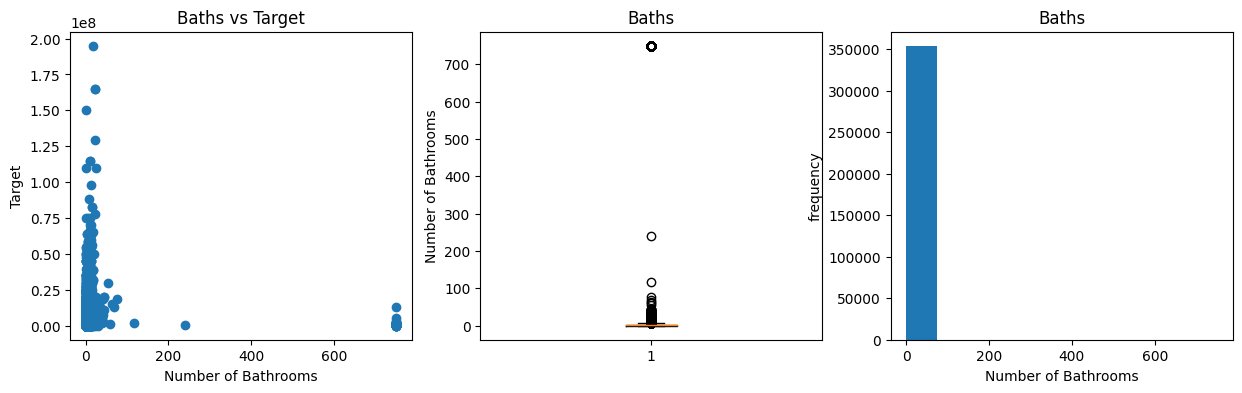

In [156]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['baths'], y=df['target'])
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Target')
ax1.set_title('Baths vs Target')

ax2.boxplot(df['baths'])
ax2.set_ylabel('Number of Bathrooms')
ax2.set_title('Baths')

ax3.hist(df['baths'])
ax3.set_title('Baths')
ax3.set_xlabel('Number of Bathrooms')
ax3.set_ylabel('frequency')

Выводы.  
Присутствуют явно ошибочные данные с количеством ванных комнат более 700.  
Но при этом, уже и более 50 уже выглядят выбросами. Необходимо найти и удалить записи.

In [157]:
df = df[df['baths']<=50.0]

Text(0, 0.5, 'frequency')

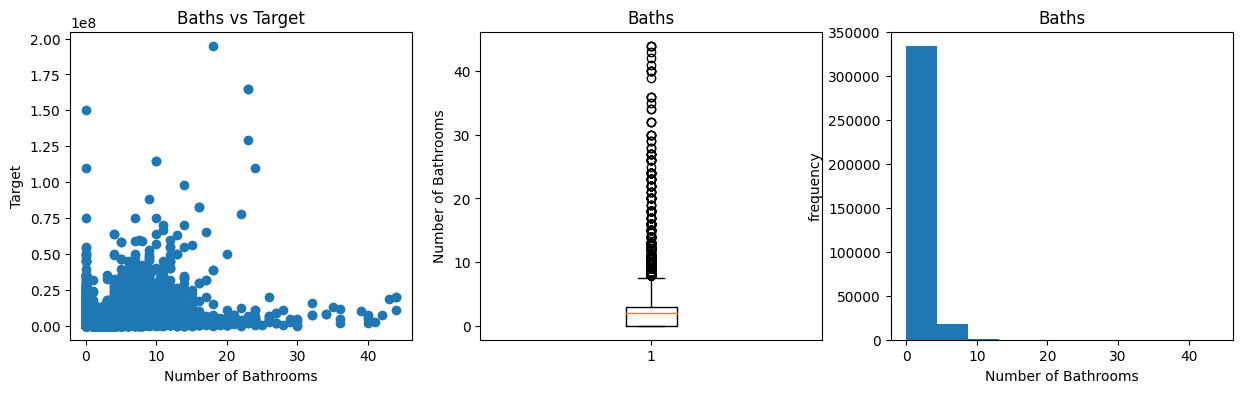

In [158]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['baths'], y=df['target'])
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Target')
ax1.set_title('Baths vs Target')

ax2.boxplot(df['baths'])
ax2.set_ylabel('Number of Bathrooms')
ax2.set_title('Baths')

ax3.hist(df['baths'])
ax3.set_title('Baths')
ax3.set_xlabel('Number of Bathrooms')
ax3.set_ylabel('frequency')

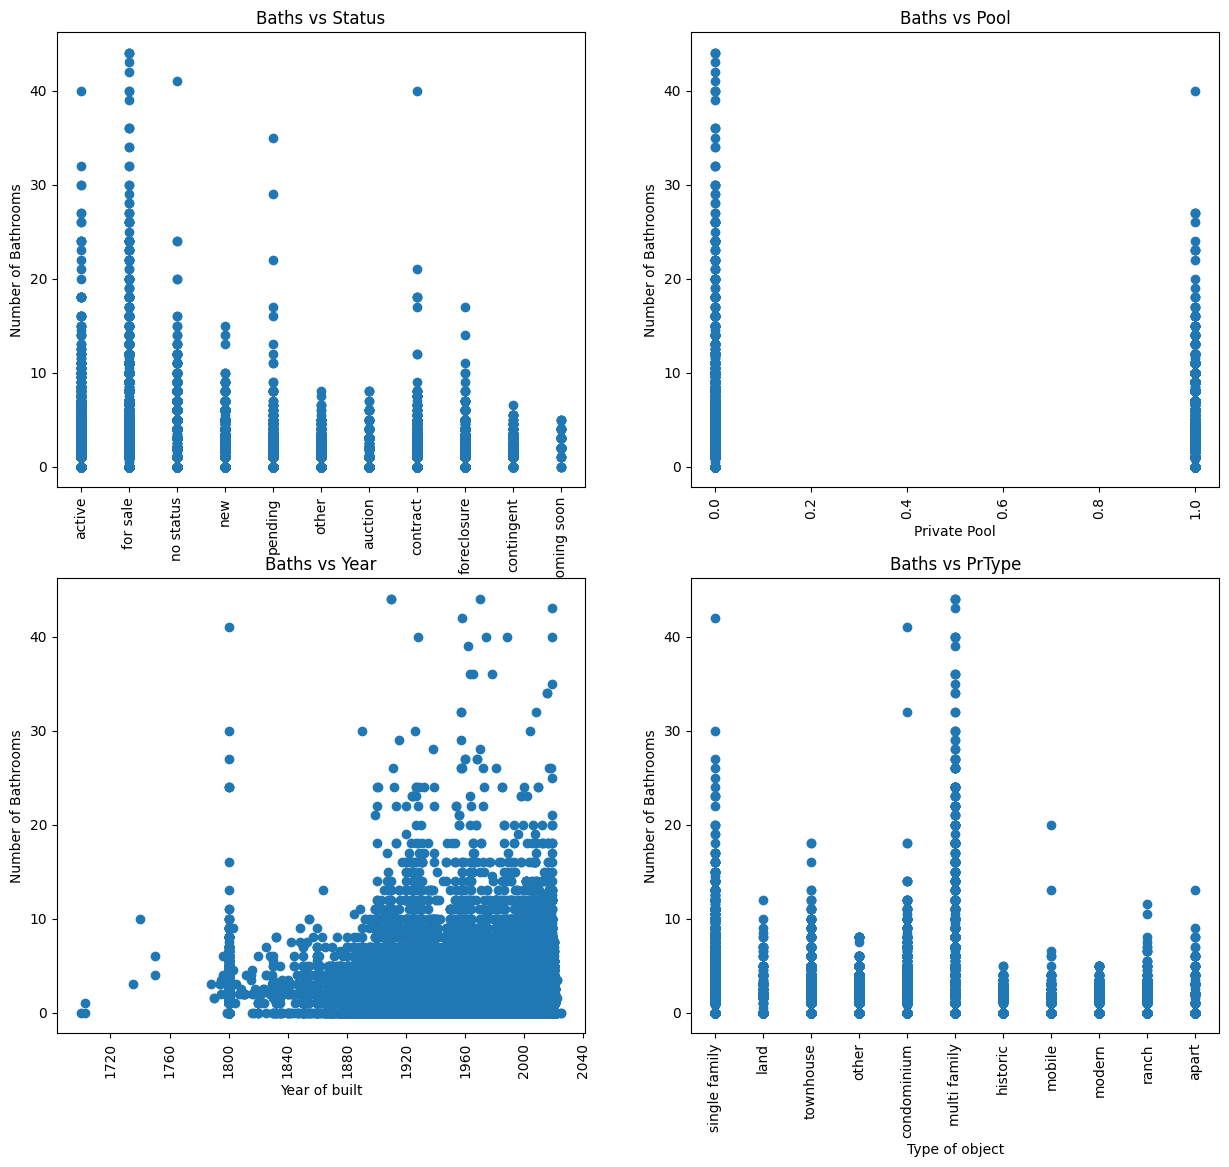

In [159]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=df['status'], y=df['baths'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Number of Bathrooms')
axes[0][0].set_title('Baths vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=df['PoolPrivate'], y=df['baths'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Number of Bathrooms')
axes[0][1].set_title('Baths vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=df['Year built'], y=df['baths'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Number of Bathrooms')
axes[1][0].set_title('Baths vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=df['PrType'], y=df['baths'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Number of Bathrooms')
axes[1][1].set_title('Baths vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

##### SQFT - площадь объекта в футах

Text(0, 0.5, 'frequency')

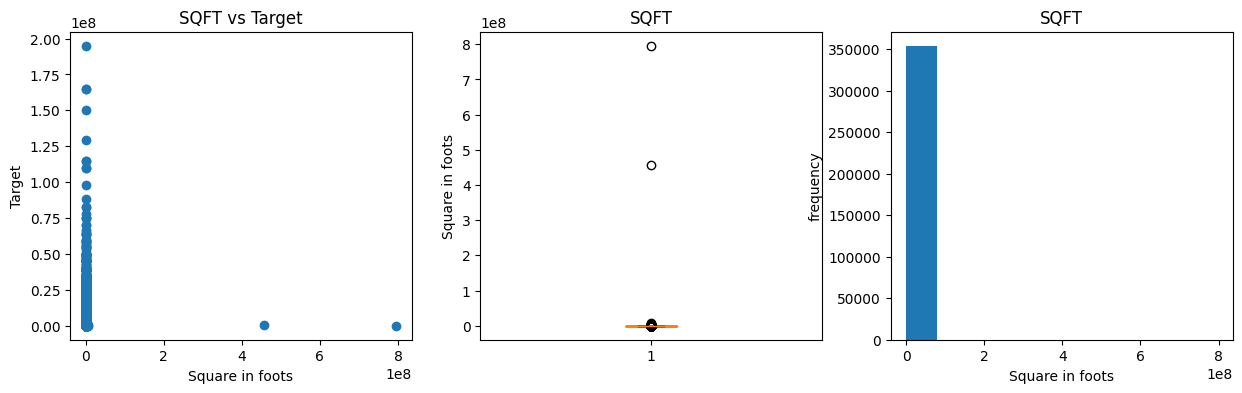

In [160]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['sqft'], y=df['target'])
ax1.set_xlabel('Square in foots')
ax1.set_ylabel('Target')
ax1.set_title('SQFT vs Target')

ax2.boxplot(df['sqft'])
ax2.set_ylabel('Square in foots')
ax2.set_title('SQFT')

ax3.hist(df['sqft'])
ax3.set_title('SQFT')
ax3.set_xlabel('Square in foots')
ax3.set_ylabel('frequency')

Выводы.  
Выбросами расцениваем все значения свыше 2,5 млн

In [161]:
df = df[df['sqft']<2500000.0]

Text(0, 0.5, 'frequency')

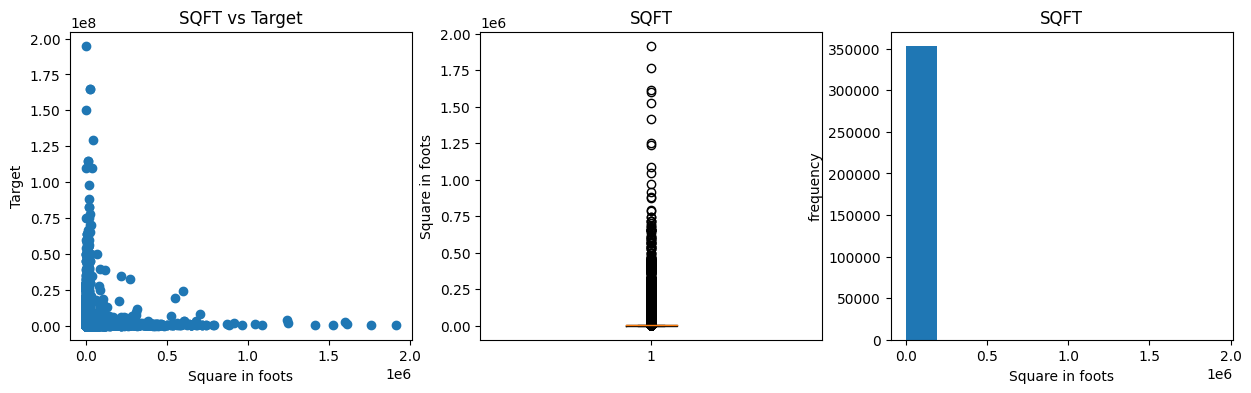

In [162]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['sqft'], y=df['target'])
ax1.set_xlabel('Square in foots')
ax1.set_ylabel('Target')
ax1.set_title('SQFT vs Target')

ax2.boxplot(df['sqft'])
ax2.set_ylabel('Square in foots')
ax2.set_title('SQFT')

ax3.hist(df['sqft'])
ax3.set_title('SQFT')
ax3.set_xlabel('Square in foots')
ax3.set_ylabel('frequency')

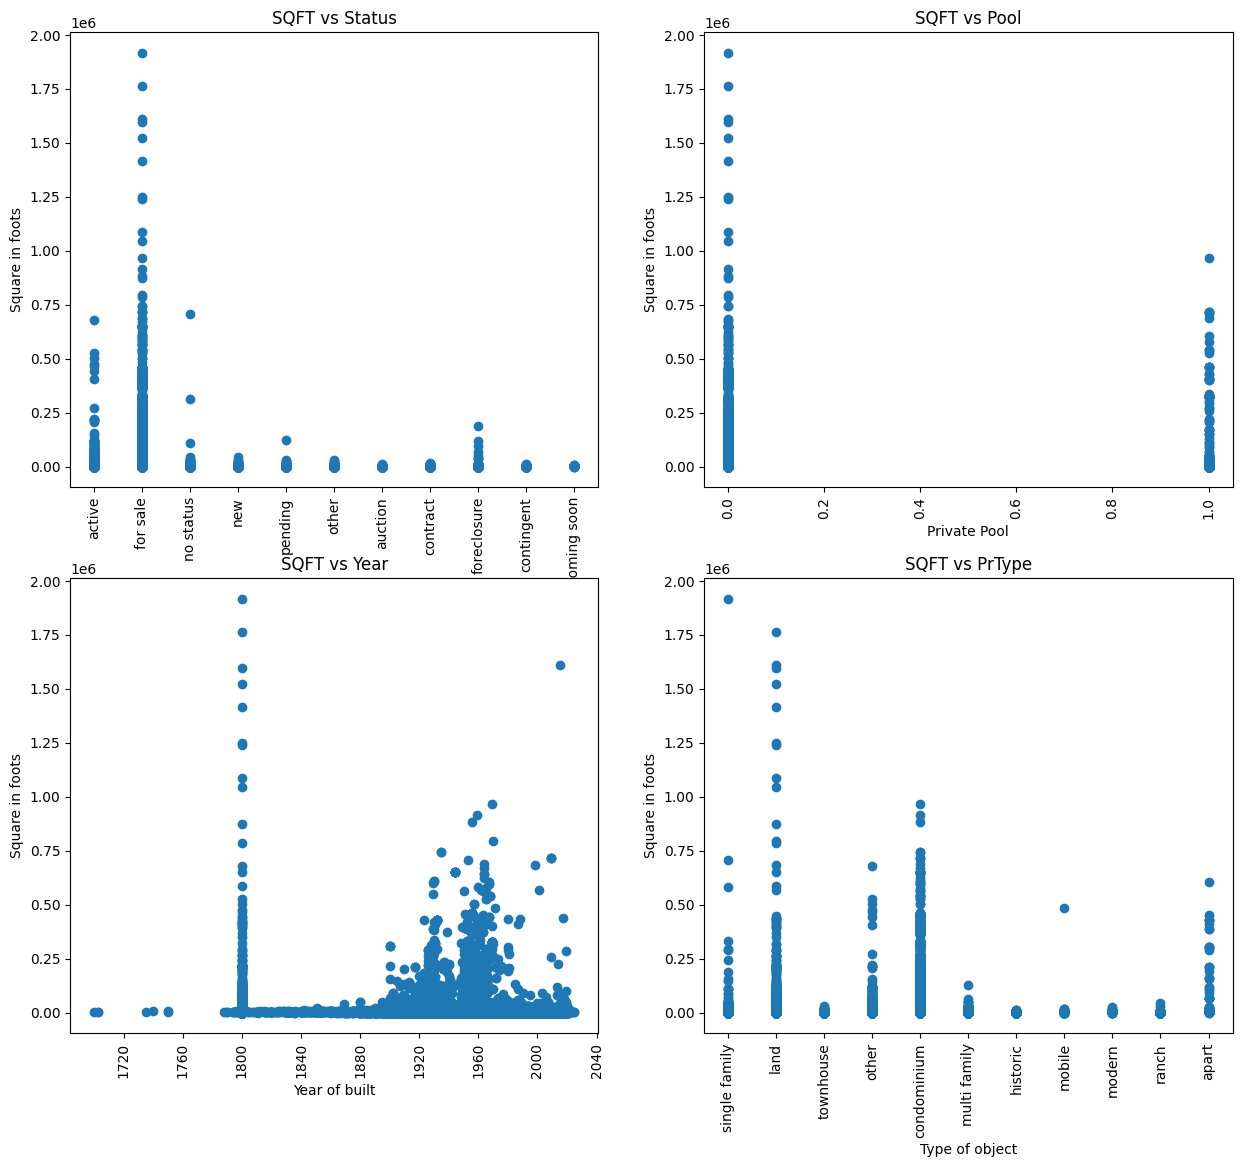

In [163]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=df['status'], y=df['sqft'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Square in foots')
axes[0][0].set_title('SQFT vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=df['PoolPrivate'], y=df['sqft'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Square in foots')
axes[0][1].set_title('SQFT vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=df['Year built'], y=df['sqft'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Square in foots')
axes[1][0].set_title('SQFT vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=df['PrType'], y=df['sqft'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Square in foots')
axes[1][1].set_title('SQFT vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

##### Beds - спальни

Text(0, 0.5, 'frequency')

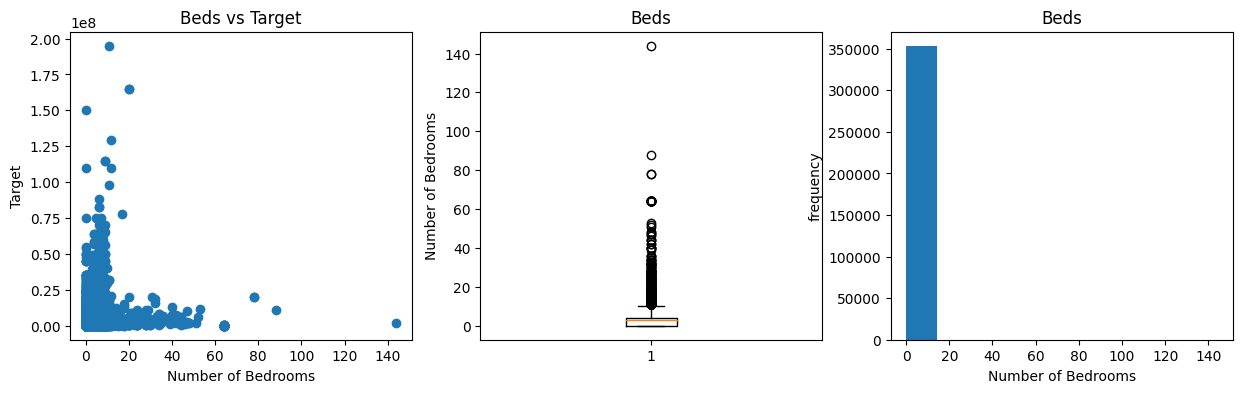

In [164]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['beds'], y=df['target'])
ax1.set_xlabel('Number of Bedrooms')
ax1.set_ylabel('Target')
ax1.set_title('Beds vs Target')

ax2.boxplot(df['beds'])
ax2.set_ylabel('Number of Bedrooms')
ax2.set_title('Beds')

ax3.hist(df['beds'])
ax3.set_title('Beds')
ax3.set_xlabel('Number of Bedrooms')
ax3.set_ylabel('frequency')

Выводы.  
Берем отсечку 60 штук, свыше удаляем как выбросы.

In [165]:
df = df[df['beds']<60.0]

Text(0, 0.5, 'frequency')

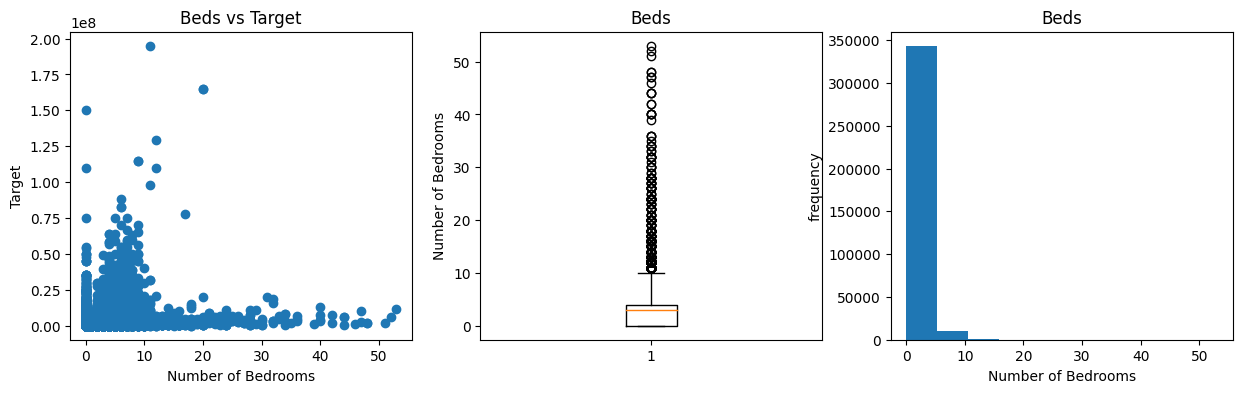

In [166]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['beds'], y=df['target'])
ax1.set_xlabel('Number of Bedrooms')
ax1.set_ylabel('Target')
ax1.set_title('Beds vs Target')

ax2.boxplot(df['beds'])
ax2.set_ylabel('Number of Bedrooms')
ax2.set_title('Beds')

ax3.hist(df['beds'])
ax3.set_title('Beds')
ax3.set_xlabel('Number of Bedrooms')
ax3.set_ylabel('frequency')

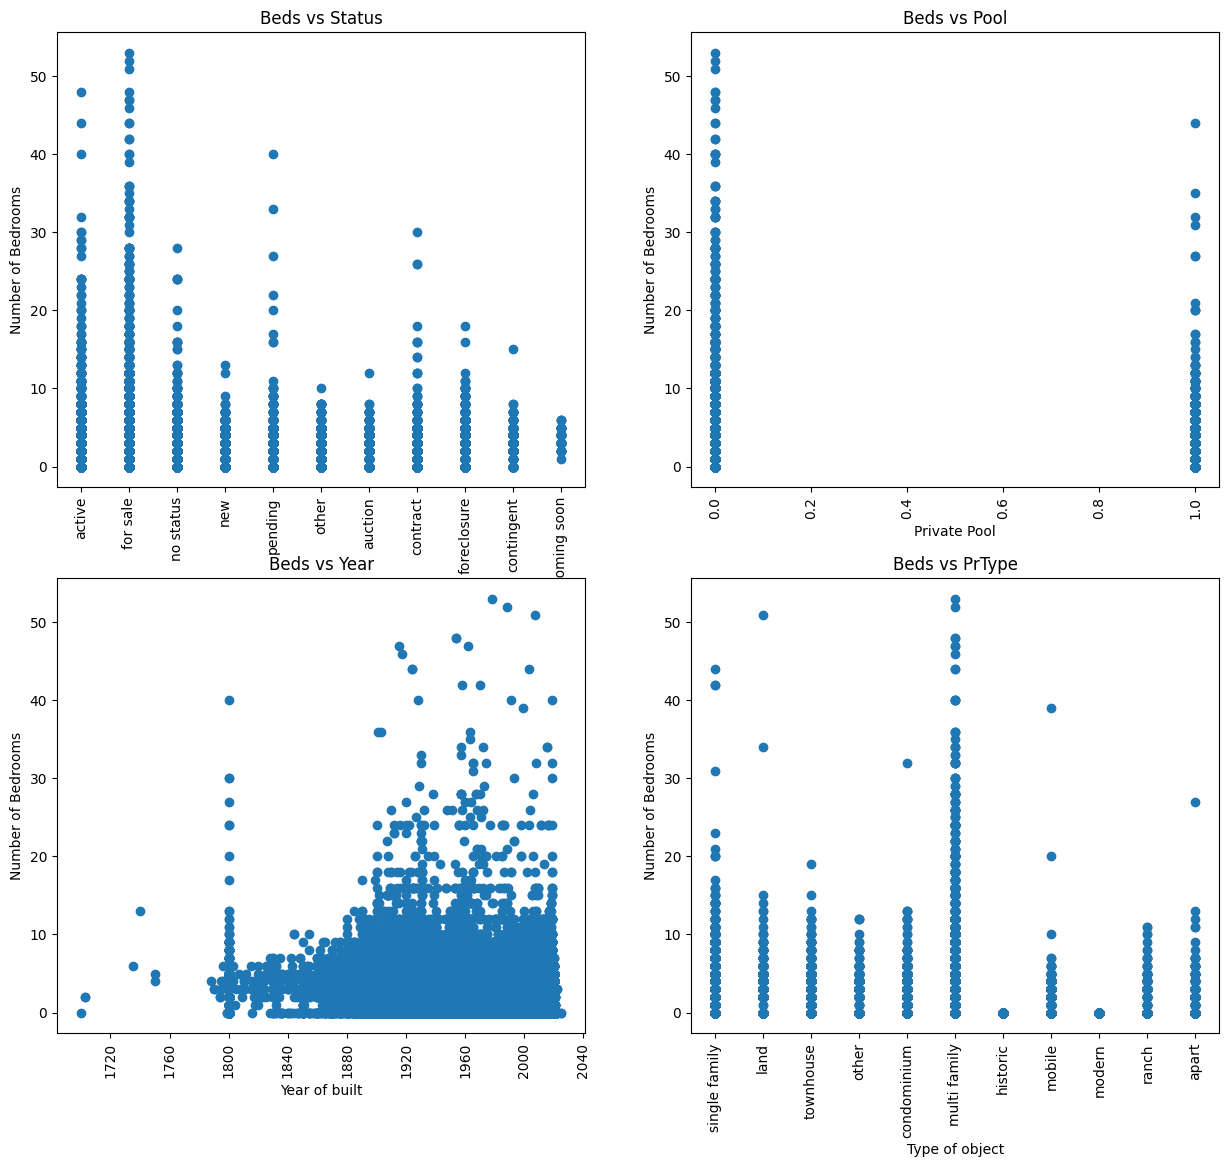

In [167]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=df['status'], y=df['beds'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Number of Bedrooms')
axes[0][0].set_title('Beds vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=df['PoolPrivate'], y=df['beds'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Number of Bedrooms')
axes[0][1].set_title('Beds vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=df['Year built'], y=df['beds'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Number of Bedrooms')
axes[1][0].set_title('Beds vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=df['PrType'], y=df['beds'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Number of Bedrooms')
axes[1][1].set_title('Beds vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

##### Target - цена объекта

Text(0, 0.5, 'frequency')

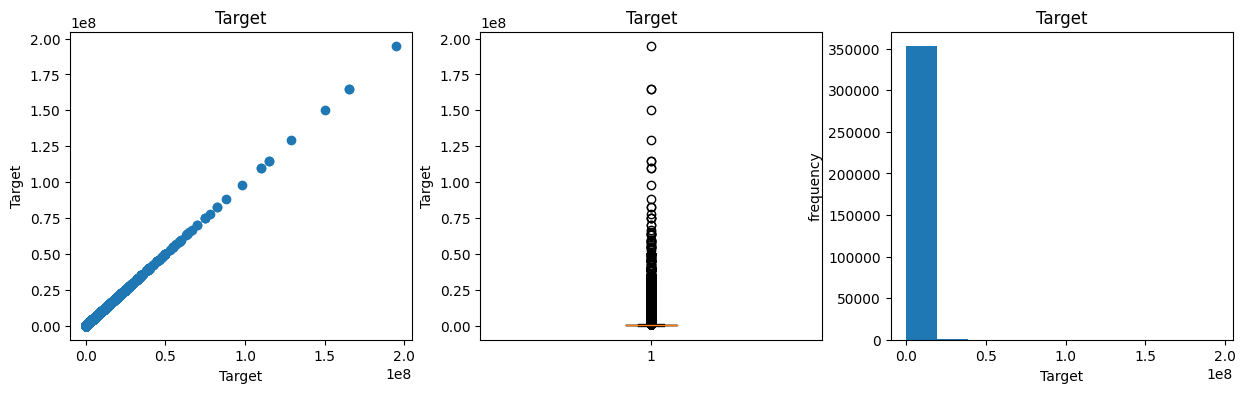

In [168]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['target'], y=df['target'])
ax1.set_xlabel('Target')
ax1.set_ylabel('Target')
ax1.set_title('Target')

ax2.boxplot(df['target'])
ax2.set_ylabel('Target')
ax2.set_title('Target')

ax3.hist(df['target'])
ax3.set_title('Target')
ax3.set_xlabel('Target')
ax3.set_ylabel('frequency')

Выводы.  
Делаем отсечку в 15млн, свыше считаем выбросами.

In [169]:
df = df[df['target']<15000000]

Text(0, 0.5, 'frequency')

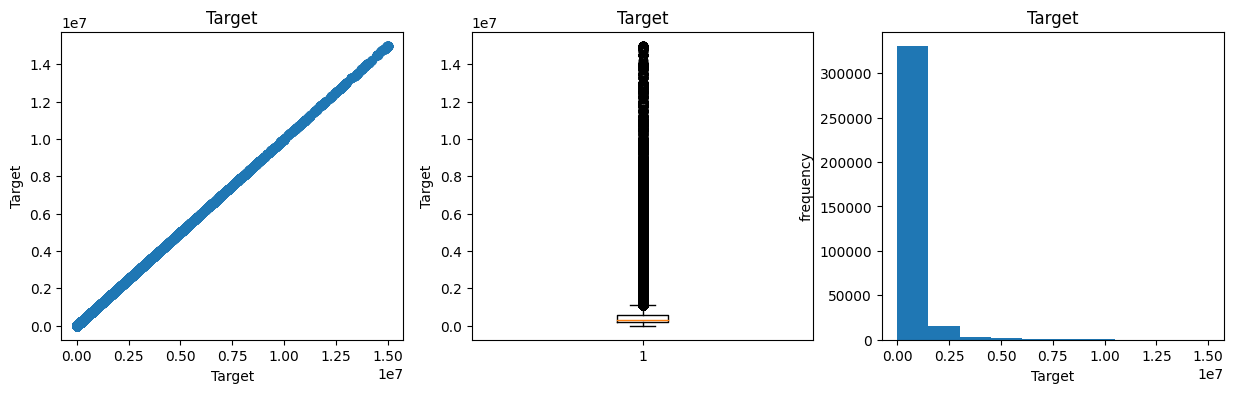

In [170]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['target'], y=df['target'])
ax1.set_xlabel('Target')
ax1.set_ylabel('Target')
ax1.set_title('Target')

ax2.boxplot(df['target'])
ax2.set_ylabel('Target')
ax2.set_title('Target')

ax3.hist(df['target'])
ax3.set_title('Target')
ax3.set_xlabel('Target')
ax3.set_ylabel('frequency')

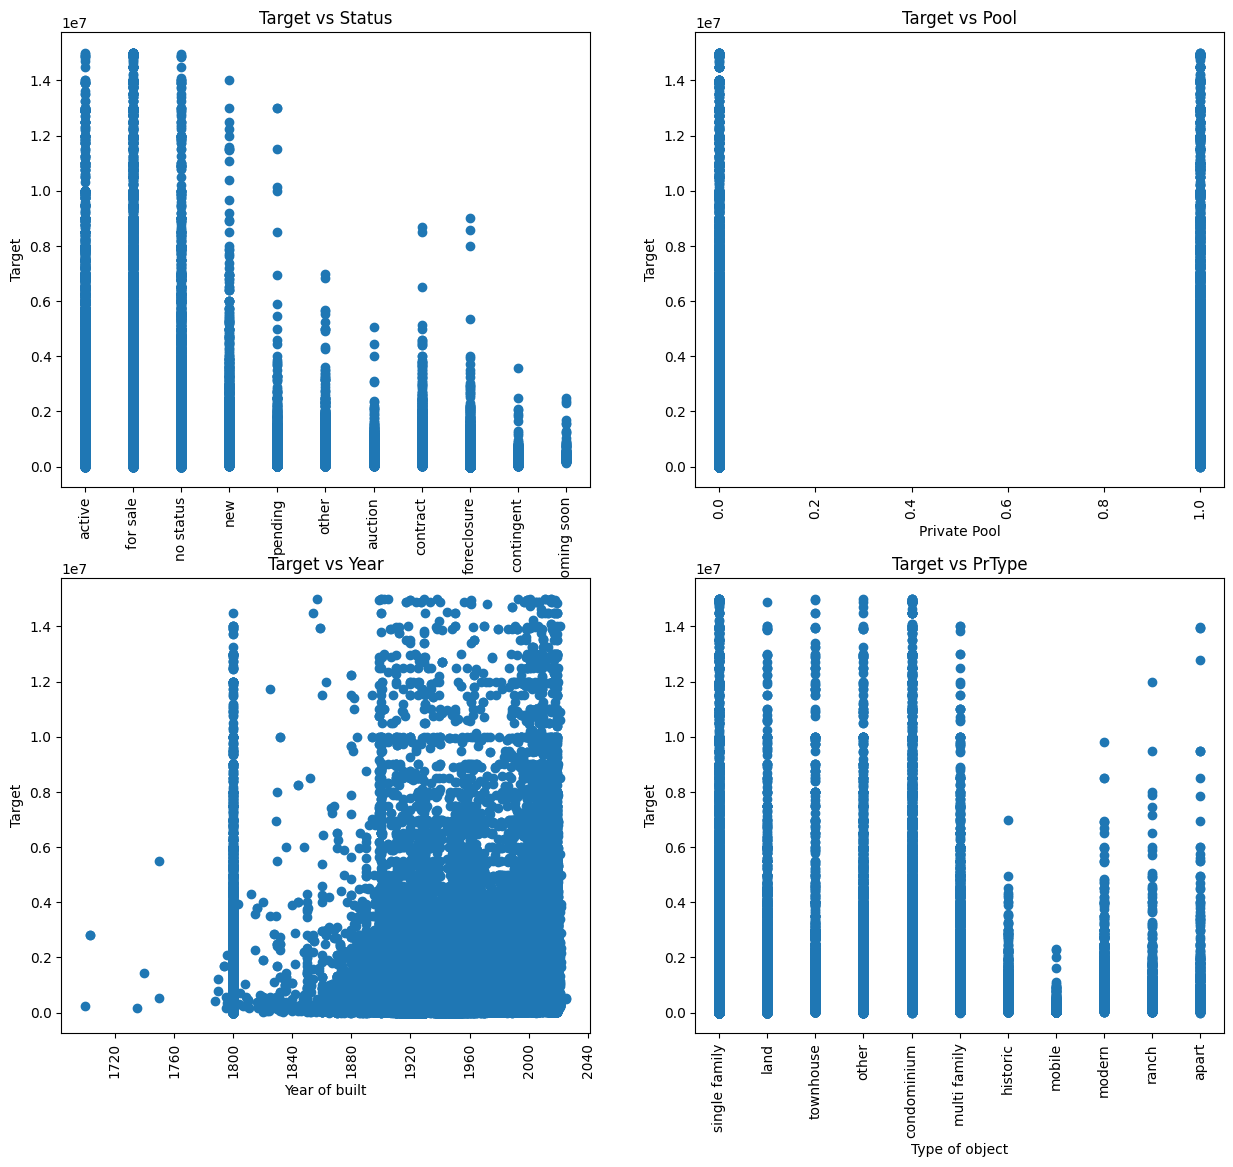

In [171]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=df['status'], y=df['target'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Target')
axes[0][0].set_title('Target vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=df['PoolPrivate'], y=df['target'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Target')
axes[0][1].set_title('Target vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=df['Year built'], y=df['target'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Target')
axes[1][0].set_title('Target vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=df['PrType'], y=df['target'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Target')
axes[1][1].set_title('Target vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

##### Lotsize - размер участка

Text(0, 0.5, 'frequency')

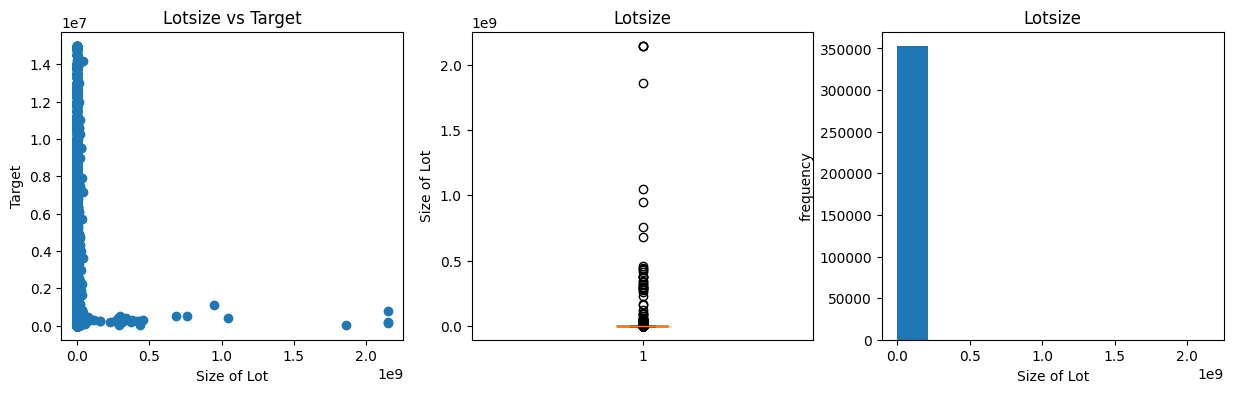

In [172]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['lotsize'], y=df['target'])
ax1.set_xlabel('Size of Lot')
ax1.set_ylabel('Target')
ax1.set_title('Lotsize vs Target')

ax2.boxplot(df['lotsize'])
ax2.set_ylabel('Size of Lot')
ax2.set_title('Lotsize')

ax3.hist(df['lotsize'])
ax3.set_title('Lotsize')
ax3.set_xlabel('Size of Lot')
ax3.set_ylabel('frequency')

Выводы.  
От 50млн считаем выбросами.

In [173]:
df = df[df['lotsize']<50000000]

Text(0, 0.5, 'frequency')

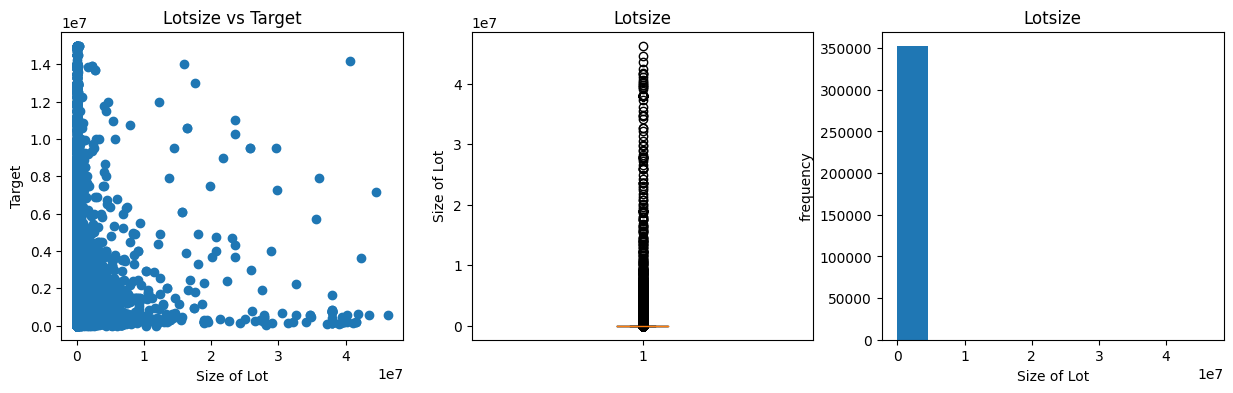

In [174]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['lotsize'], y=df['target'])
ax1.set_xlabel('Size of Lot')
ax1.set_ylabel('Target')
ax1.set_title('Lotsize vs Target')

ax2.boxplot(df['lotsize'])
ax2.set_ylabel('Size of Lot')
ax2.set_title('Lotsize')

ax3.hist(df['lotsize'])
ax3.set_title('Lotsize')
ax3.set_xlabel('Size of Lot')
ax3.set_ylabel('frequency')

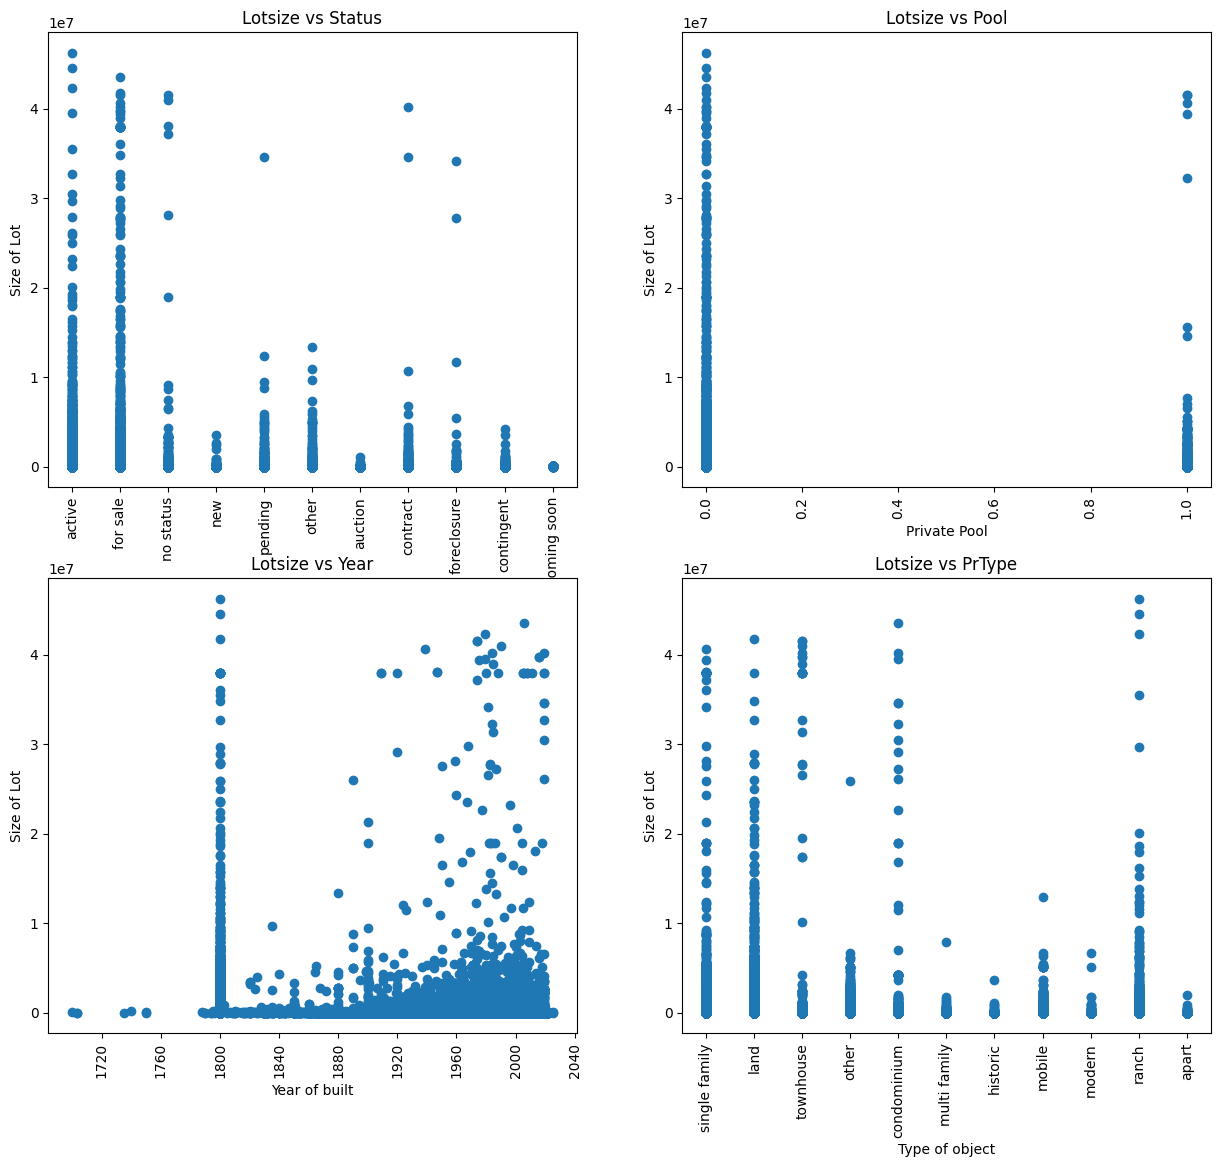

In [175]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=df['status'], y=df['lotsize'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Size of Lot')
axes[0][0].set_title('Lotsize vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=df['PoolPrivate'], y=df['lotsize'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Size of Lot')
axes[0][1].set_title('Lotsize vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=df['Year built'], y=df['lotsize'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Size of Lot')
axes[1][0].set_title('Lotsize vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=df['PrType'], y=df['lotsize'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Size of Lot')
axes[1][1].set_title('Lotsize vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

##### School_rate - средний рейтинг близлежащих школ

Text(0, 0.5, 'frequency')

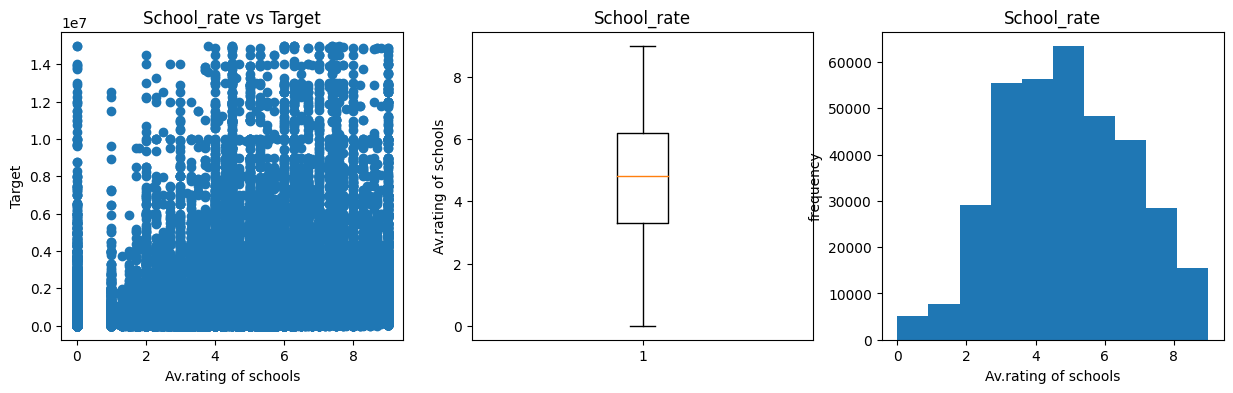

In [176]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['school_rate'], y=df['target'])
ax1.set_xlabel('Av.rating of schools')
ax1.set_ylabel('Target')
ax1.set_title('School_rate vs Target')

ax2.boxplot(df['school_rate'])
ax2.set_ylabel('Av.rating of schools')
ax2.set_title('School_rate')

ax3.hist(df['school_rate'])
ax3.set_title('School_rate')
ax3.set_xlabel('Av.rating of schools')
ax3.set_ylabel('frequency')

Выводы.  
Явных выбросов не наблюдается.

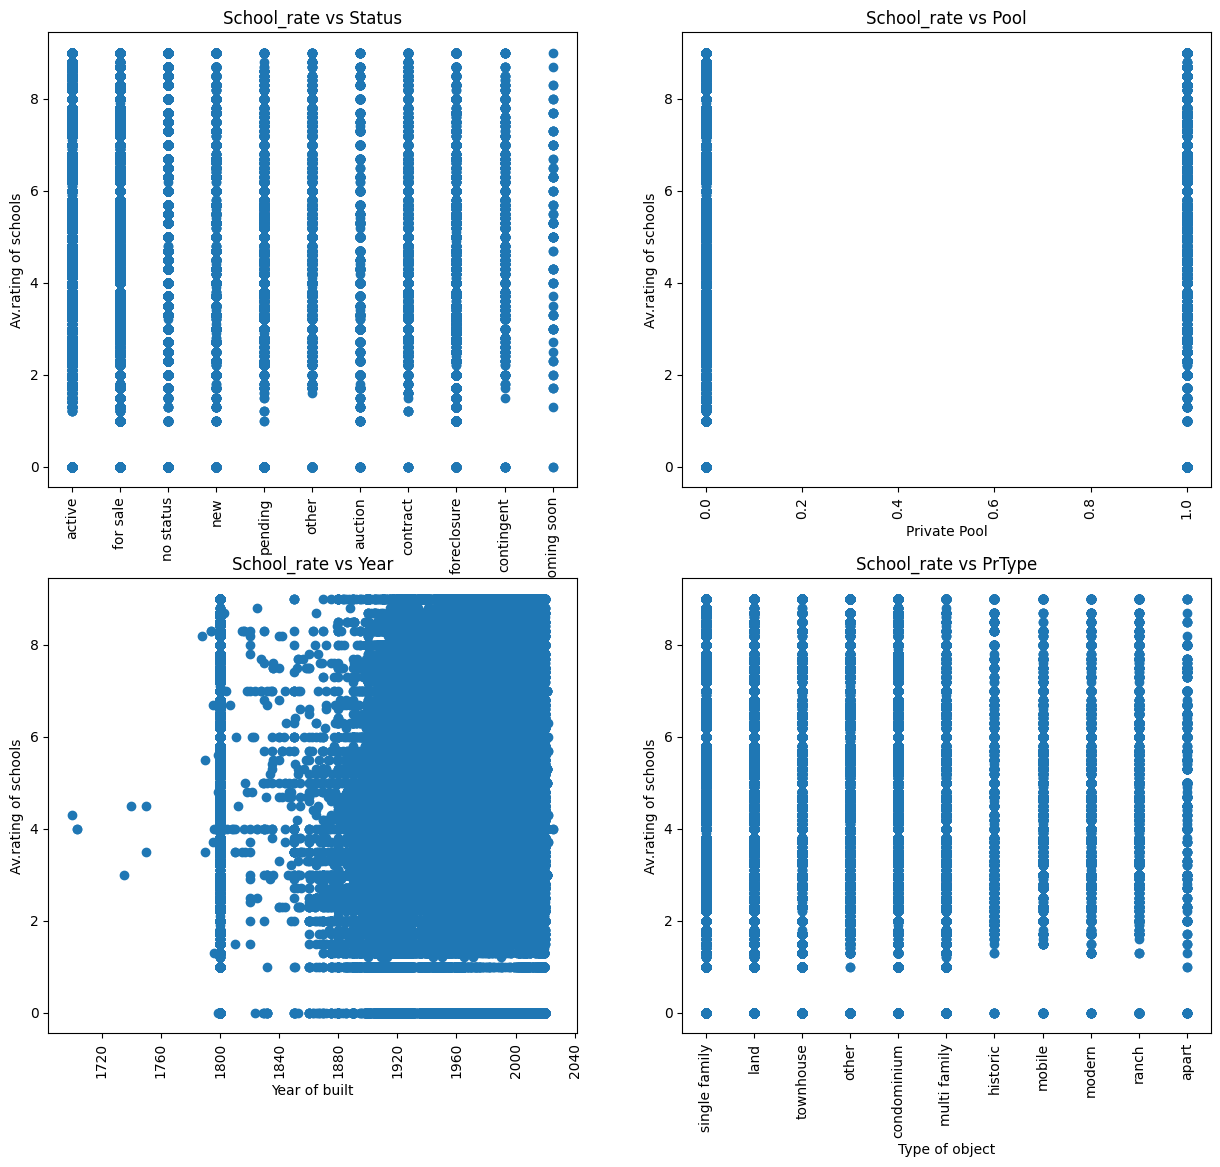

In [177]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=df['status'], y=df['school_rate'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Av.rating of schools')
axes[0][0].set_title('School_rate vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=df['PoolPrivate'], y=df['school_rate'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Av.rating of schools')
axes[0][1].set_title('School_rate vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=df['Year built'], y=df['school_rate'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Av.rating of schools')
axes[1][0].set_title('School_rate vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=df['PrType'], y=df['school_rate'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Av.rating of schools')
axes[1][1].set_title('School_rate vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

##### School_dist - расстояние до ближайшей школы

Text(0, 0.5, 'frequency')

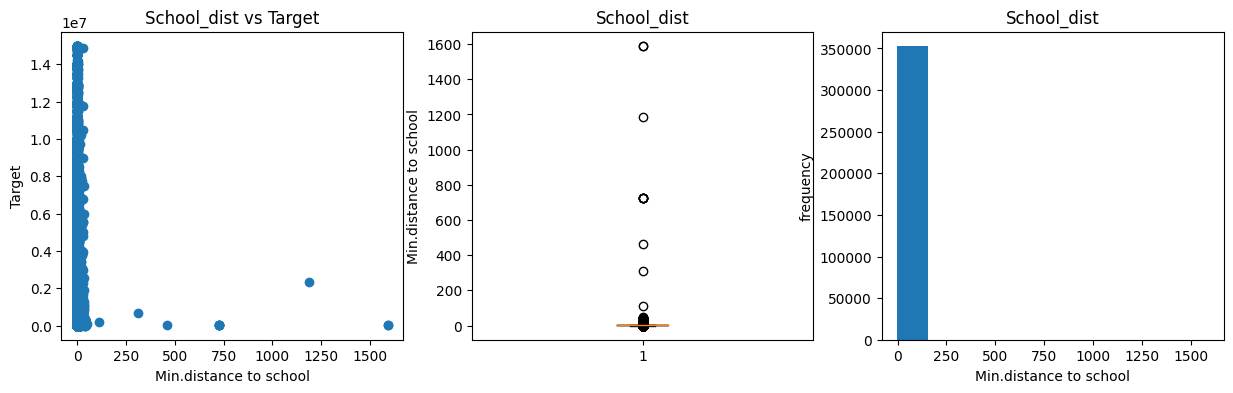

In [178]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['school_dist'], y=df['target'])
ax1.set_xlabel('Min.distance to school')
ax1.set_ylabel('Target')
ax1.set_title('School_dist vs Target')

ax2.boxplot(df['school_dist'])
ax2.set_ylabel('Min.distance to school')
ax2.set_title('School_dist')

ax3.hist(df['school_dist'])
ax3.set_title('School_dist')
ax3.set_xlabel('Min.distance to school')
ax3.set_ylabel('frequency')

Выводы.  
Отсечка по графикам 100. Свыше считаем выбросами и удаляем.

In [179]:
df = df[df['school_dist']<100.0]

Text(0, 0.5, 'frequency')

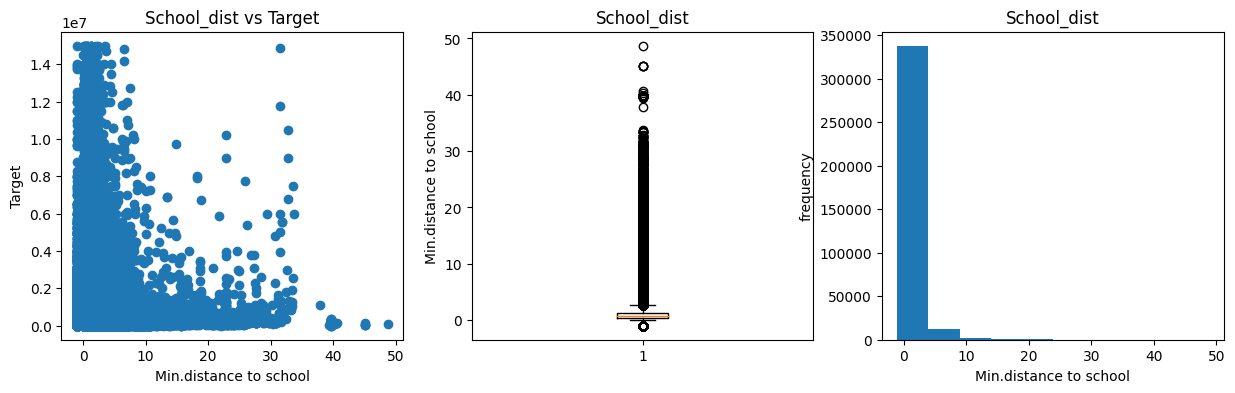

In [180]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15,4))

ax1.scatter(x=df['school_dist'], y=df['target'])
ax1.set_xlabel('Min.distance to school')
ax1.set_ylabel('Target')
ax1.set_title('School_dist vs Target')

ax2.boxplot(df['school_dist'])
ax2.set_ylabel('Min.distance to school')
ax2.set_title('School_dist')

ax3.hist(df['school_dist'])
ax3.set_title('School_dist')
ax3.set_xlabel('Min.distance to school')
ax3.set_ylabel('frequency')

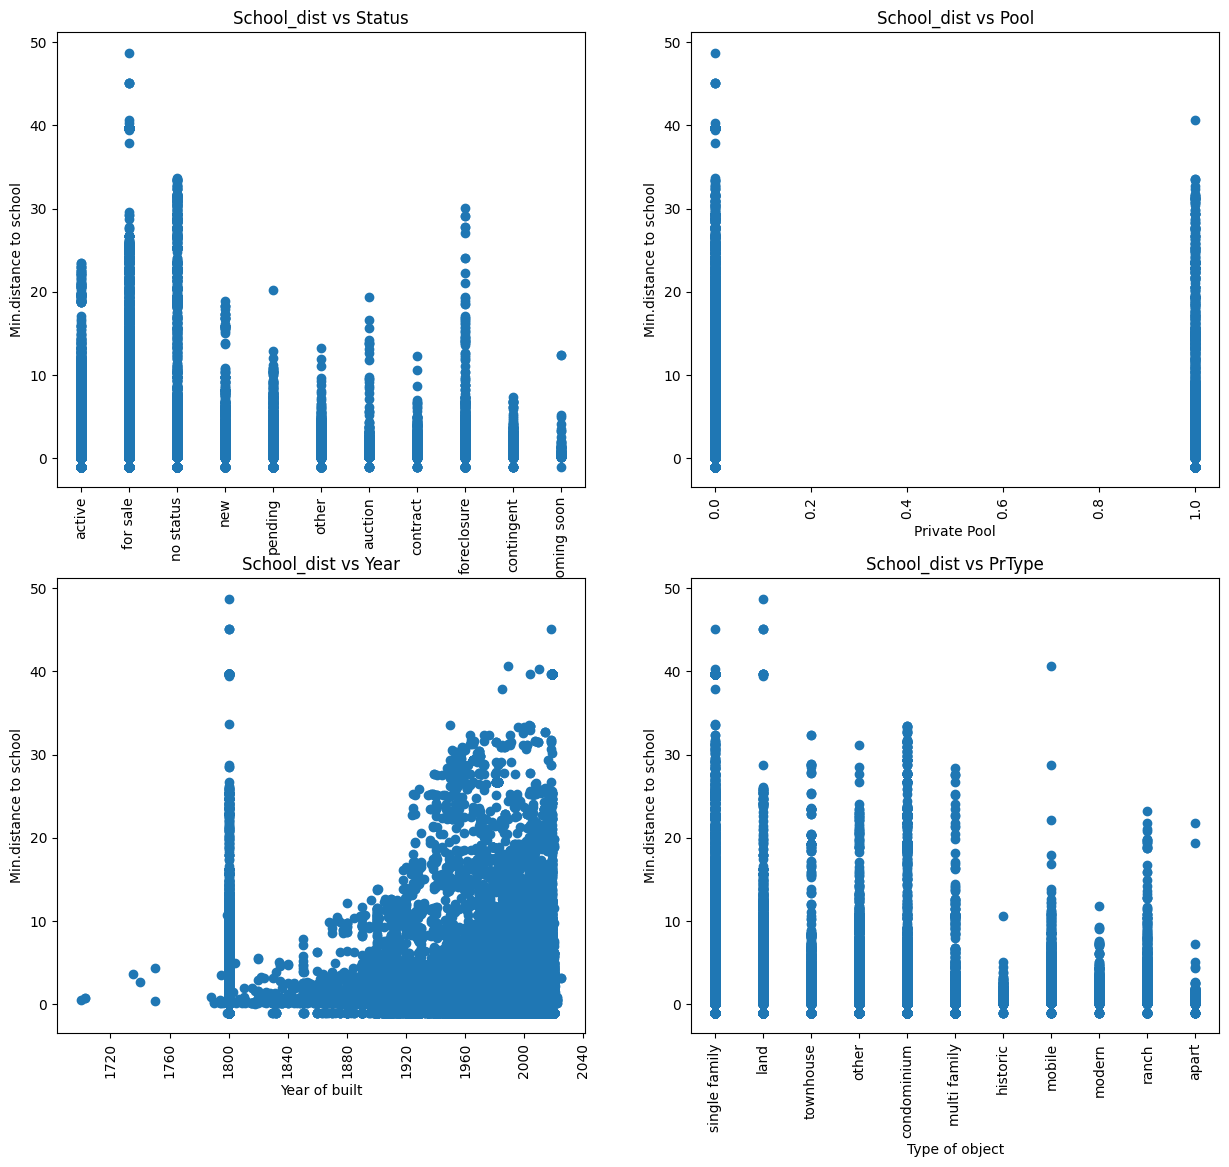

In [181]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,13))

axes[0][0].scatter(x=df['status'], y=df['school_dist'])
axes[0][0].set_xlabel('Status')
axes[0][0].set_ylabel('Min.distance to school')
axes[0][0].set_title('School_dist vs Status')
axes[0][0].xaxis.set_tick_params(rotation=90)

axes[0][1].scatter(x=df['PoolPrivate'], y=df['school_dist'])
axes[0][1].set_xlabel('Private Pool')
axes[0][1].set_ylabel('Min.distance to school')
axes[0][1].set_title('School_dist vs Pool')
axes[0][1].xaxis.set_tick_params(rotation=90)

axes[1][0].scatter(x=df['Year built'], y=df['school_dist'])
axes[1][0].set_xlabel('Year of built')
axes[1][0].set_ylabel('Min.distance to school')
axes[1][0].set_title('School_dist vs Year')
axes[1][0].xaxis.set_tick_params(rotation=90)

axes[1][1].scatter(x=df['PrType'], y=df['school_dist'])
axes[1][1].set_xlabel('Type of object')
axes[1][1].set_ylabel('Min.distance to school')
axes[1][1].set_title('School_dist vs PrType')
axes[1][1].xaxis.set_tick_params(rotation=90)

### Матрица корреляций.

In [182]:
small_df_corr = df.drop(['status','Year built', 'PrType', 'street', 'city', 'zipcode', 'state', 'MLS'], axis=1)

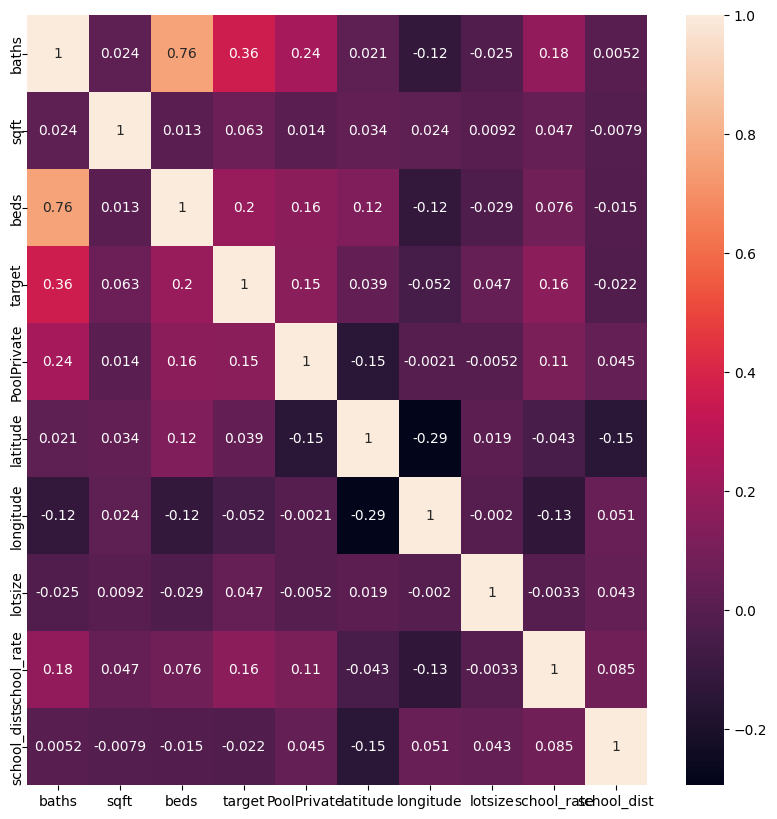

In [183]:
# Проверим числовые признаки на корреляцию и как результат на мультиколлинеарность
# строим матрицу корреляций
corr_matrix = np.corrcoef(small_df_corr, rowvar=False)
# создаем фигуру
plt.figure(figsize=(len(small_df_corr.columns), len(small_df_corr.columns)))
# строим тепловую карту
sns.heatmap(corr_matrix, annot=True)
# добавляем подписи столбцов на тепловой карте
plt.xticks(np.arange(len(small_df_corr.columns))+0.5, small_df_corr.columns, rotation=0, ha='center', fontsize=10)
plt.yticks(np.arange(len(small_df_corr.columns))+0.5, small_df_corr.columns, ha='center', fontsize=10, va='center', rotation=90)
# отображаем график
plt.show()

Сильная взаимосвязь (мультикорреляция) между числовыми признаками отсутствует.

In [184]:
# среди признаков неактуальны для построения модели и будем удалять:
# street, city, state, MLS
df = df.drop(['street', 'city', 'state', 'MLS'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352505 entries, 0 to 353504
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   status       352505 non-null  object        
 1   baths        352505 non-null  float64       
 2   sqft         352505 non-null  float64       
 3   zipcode      352505 non-null  object        
 4   beds         352505 non-null  float64       
 5   target       352505 non-null  int64         
 6   PoolPrivate  352505 non-null  int64         
 7   latitude     352505 non-null  float64       
 8   longitude    352505 non-null  float64       
 9   Year built   352505 non-null  datetime64[ns]
 10  lotsize      352505 non-null  float64       
 11  school_rate  352505 non-null  float64       
 12  school_dist  352505 non-null  float64       
 13  PrType       352505 non-null  object        
dtypes: datetime64[ns](1), float64(8), int64(2), object(3)
memory usage: 40.3+ MB


На этом анализ данных и очистку от выбросов будем считать законченными.

In [185]:
df.to_csv('data/data_2.csv', index=False)